### Bird Species Classification Using Neural Networks

link to Dataset: https://www.kaggle.com/code/aliamjadpy/birds-classification-neural-network/input

### Overview
This project will be working on a simple feed forward neural network model to classify 20 bird species as well as ResNet50. The dataset contains various images of bird species, and the trained model should be able to identify the species in new images.



### Methodology

The model classier also applied the Sequential feedforward neural network architecture. The architecture consists of an input layer that comprises various numbers of dense layers with ReLU in between, and an output layer to map into probabilities with a softmax output activation function for each one of the bird species in this case.It also has a RESnet-50 architecture with Adam activation function.

### Training and Evaluation:
This model is trained on the dataset comprising 20 species of birds. It was trained for 30 epochs, while at intervals of 5, 15, and 50 epochs,the performance metrics-accuracy and loss-were measured to monitor the performance for CNN and ResNet with 10 epochs.

### Results

The results of training and evaluation at 5, 15, and 30 epochs provide insight into the model's learning progress and performance over time. These are important to understand the model's convergence and to identify the number of epochs where the best performance is obtained.

### Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Dataset Paths and Parameters

In [2]:
# Set paths to dataset directories
data_dir = "C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/project/archive"  
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
valid_dir = os.path.join(data_dir, "valid")

In [3]:
os.listdir("C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/project/archive/train")

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

### Data Augmentation and Preprocessing

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150),batch_size=32,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
test_generator[0][0].shape

(32, 150, 150, 3)

In [7]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [8]:
validation_generator[0][0].shape

(32, 150, 150, 3)

In [9]:
img= train_generator[0]
print(img)

(array([[[[0.58431375, 0.50980395, 0.3529412 ],
         [0.5254902 , 0.454902  , 0.3137255 ],
         [0.4901961 , 0.427451  , 0.29411766],
         ...,
         [0.3529412 , 0.3137255 , 0.21568629],
         [0.34117648, 0.31764707, 0.22352943],
         [0.2627451 , 0.24313727, 0.16470589]],

        [[0.57254905, 0.49803925, 0.34117648],
         [0.5176471 , 0.44705886, 0.30588236],
         [0.48235297, 0.41960788, 0.28627452],
         ...,
         [0.41176474, 0.37254903, 0.26666668],
         [0.3803922 , 0.3529412 , 0.2509804 ],
         [0.3019608 , 0.2784314 , 0.19215688]],

        [[0.5647059 , 0.4901961 , 0.33333334],
         [0.50980395, 0.43921572, 0.29803923],
         [0.4784314 , 0.4156863 , 0.28235295],
         ...,
         [0.45098042, 0.40784317, 0.29803923],
         [0.41176474, 0.38431376, 0.27450982],
         [0.32941177, 0.30588236, 0.21960786]],

        ...,

        [[0.54509807, 0.4039216 , 0.2627451 ],
         [0.5686275 , 0.43137258, 0.28235295

In [10]:
print(len(train_generator))
print(len(test_dir))
print(len(valid_dir))

101
98
99


In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

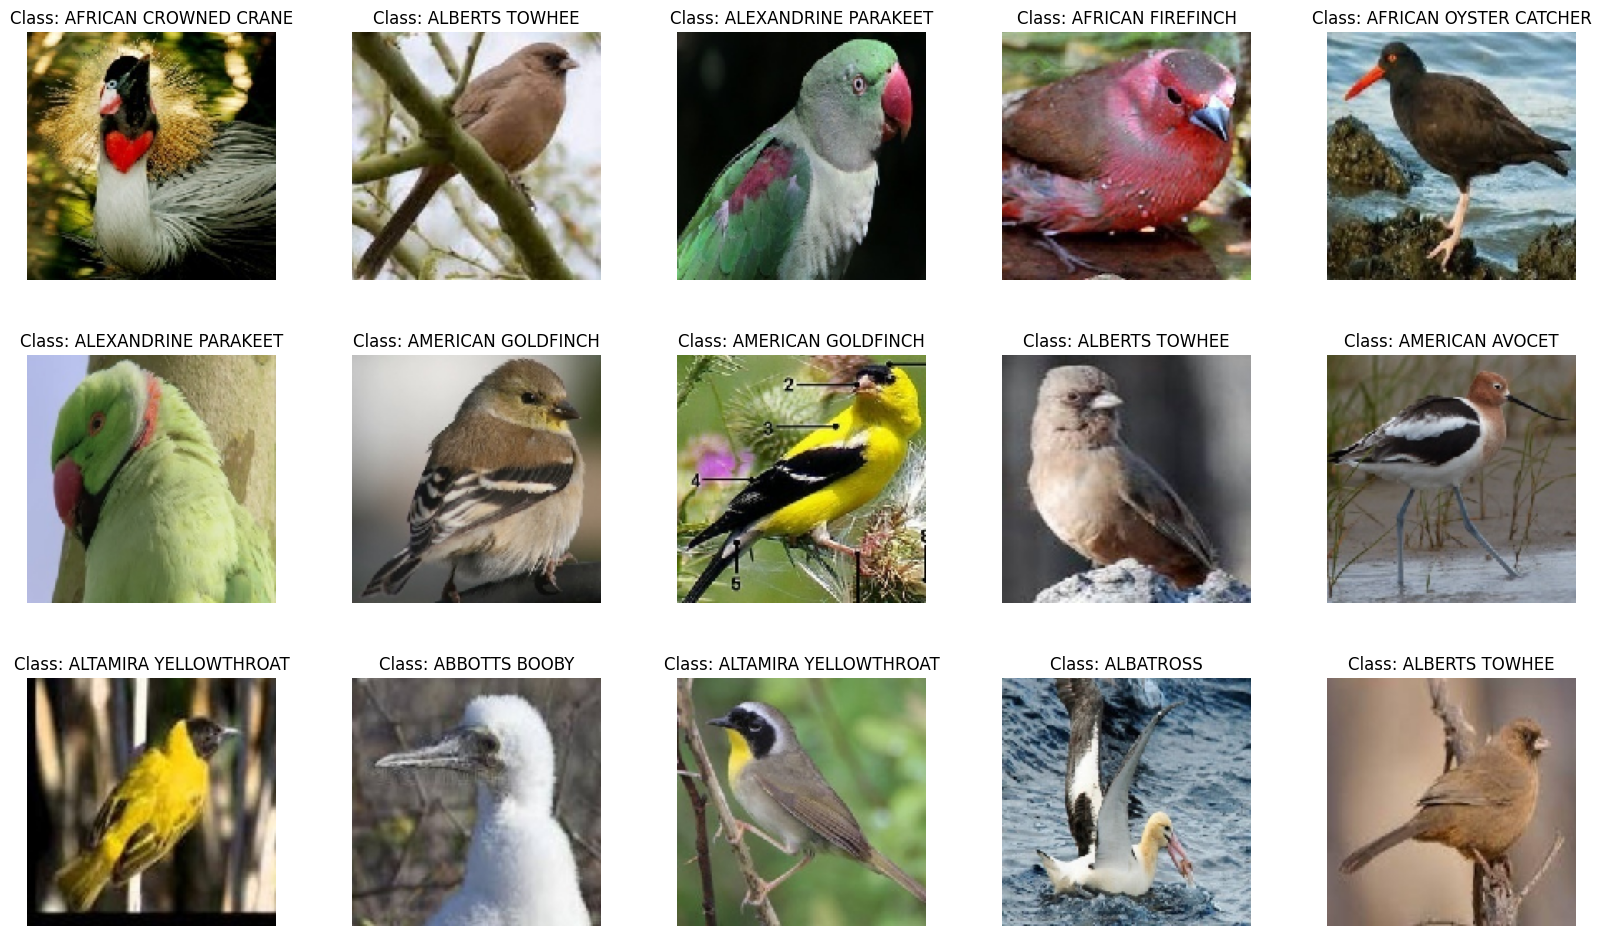

In [12]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the Sequential feedforward neural network model
seq_model = Sequential([ 
    Flatten(input_shape=(150,150,3), name='input_layer'),
    Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    Dense(20, activation='softmax', name='output_layer')
])

In [18]:
# Print the model summary

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 67500)             0         
                                                                 
 layer1 (Dense)              (None, 128)               8640128   
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 20)                660       
                                                                 
Total params: 8,651,124
Trainable params: 8,651,124
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 150, 150, 3)
(32, 20)


In [21]:
history = seq_model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/5
101/101 [==============================] - 27s 257ms/step - loss: 2.9984 - accuracy: 0.0848 - val_loss: 2.8731 - val_accuracy: 0.1000
Epoch 2/5
101/101 [==============================] - 8s 74ms/step - loss: 2.8701 - accuracy: 0.1113 - val_loss: 2.8464 - val_accuracy: 0.1400
Epoch 3/5
101/101 [==============================] - 8s 75ms/step - loss: 2.7806 - accuracy: 0.1459 - val_loss: 2.7020 - val_accuracy: 0.2000
Epoch 4/5
101/101 [==============================] - 8s 74ms/step - loss: 2.7258 - accuracy: 0.1696 - val_loss: 2.6812 - val_accuracy: 0.2200
Epoch 5/5
101/101 [==============================] - 8s 74ms/step - loss: 2.6399 - accuracy: 0.1827 - val_loss: 2.5744 - val_accuracy: 0.2300


In [22]:
n_categories = len(os.listdir('C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/project/archive/train'))# number of categories
print(n_categories)

20


In [23]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
0,2.998360,0.084788,2.873109,0.10
1,2.870146,0.111284,2.846367,0.14
2,2.780577,0.145885,2.701974,0.20
3,2.725801,0.169576,2.681244,0.22
4,2.639852,0.182668,2.574365,0.23


In [24]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.998360,0.084788,2.873109,0.10
1,2.870146,0.111284,2.846367,0.14
2,2.780577,0.145885,2.701974,0.20
3,2.725801,0.169576,2.681244,0.22
4,2.639852,0.182668,2.574365,0.23


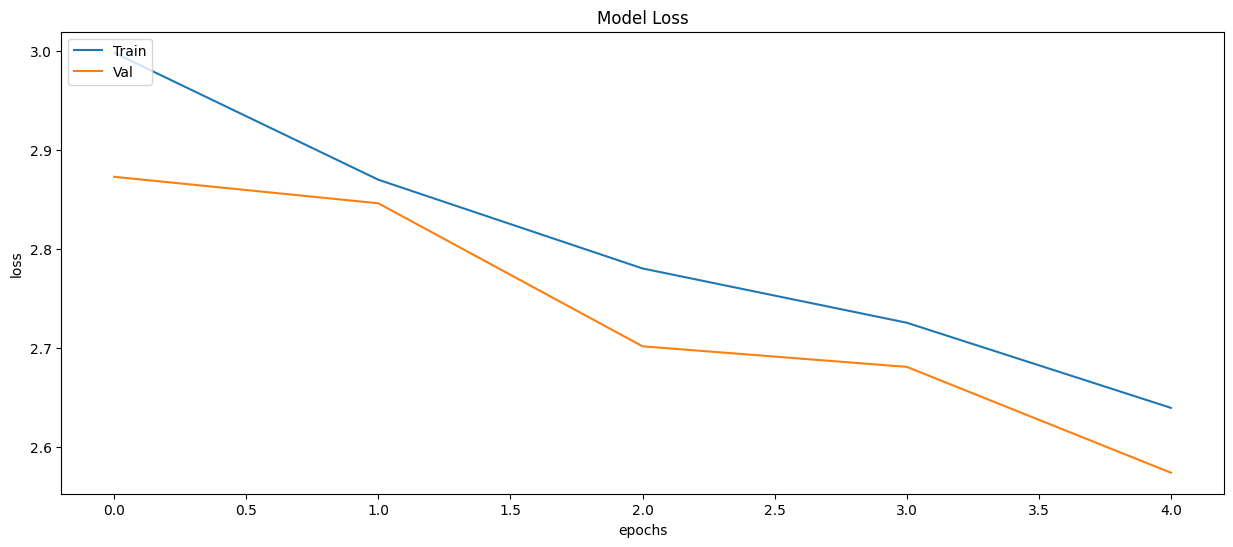

In [25]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

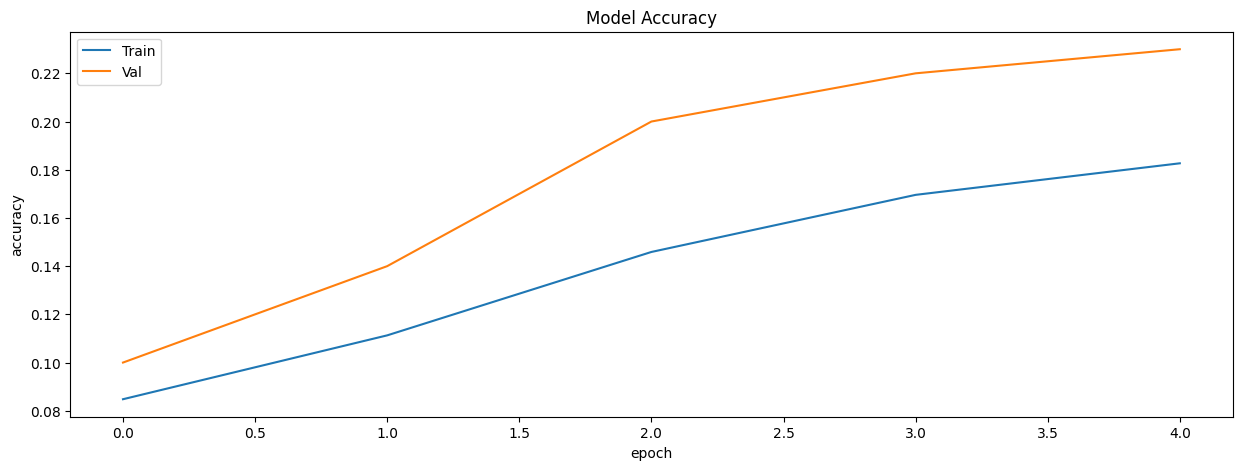

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
history = seq_model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/15
101/101 [==============================] - 8s 81ms/step - loss: 2.6053 - accuracy: 0.1986 - val_loss: 2.5512 - val_accuracy: 0.2500
Epoch 2/15
101/101 [==============================] - 8s 77ms/step - loss: 2.4970 - accuracy: 0.2388 - val_loss: 2.5891 - val_accuracy: 0.2200
Epoch 3/15
101/101 [==============================] - 8s 76ms/step - loss: 2.4261 - accuracy: 0.2478 - val_loss: 2.3586 - val_accuracy: 0.2900
Epoch 4/15
101/101 [==============================] - 8s 76ms/step - loss: 2.3305 - accuracy: 0.2830 - val_loss: 2.2780 - val_accuracy: 0.3200
Epoch 5/15
101/101 [==============================] - 8s 76ms/step - loss: 2.2632 - accuracy: 0.2918 - val_loss: 2.3448 - val_accuracy: 0.2500
Epoch 6/15
101/101 [==============================] - 8s 77ms/step - loss: 2.2168 - accuracy: 0.3201 - val_loss: 2.2731 - val_accuracy: 0.2800
Epoch 7/15
101/101 [==============================] - 8s 79ms/step - loss: 2.1102 - accuracy: 0.3429 - val_loss: 2.1445 - val_accuracy: 0.3200

In [28]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.605315,0.198566,2.551183,0.25
1,2.497014,0.238778,2.589126,0.22
2,2.426056,0.247818,2.358601,0.29
3,2.330455,0.283042,2.278029,0.32
4,2.263229,0.291771,2.344779,0.25


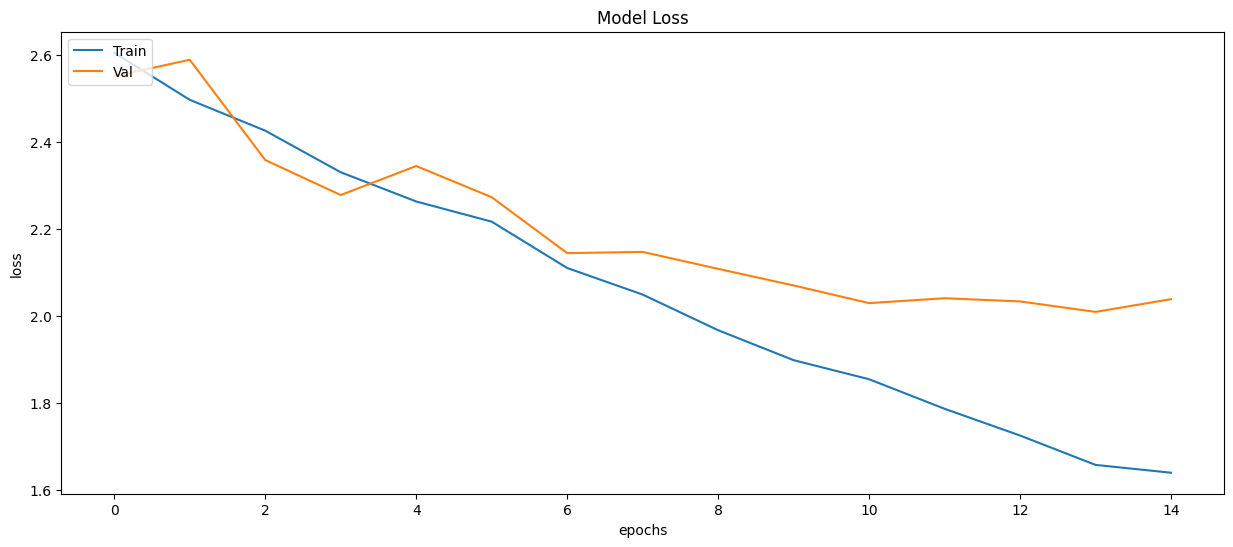

In [29]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

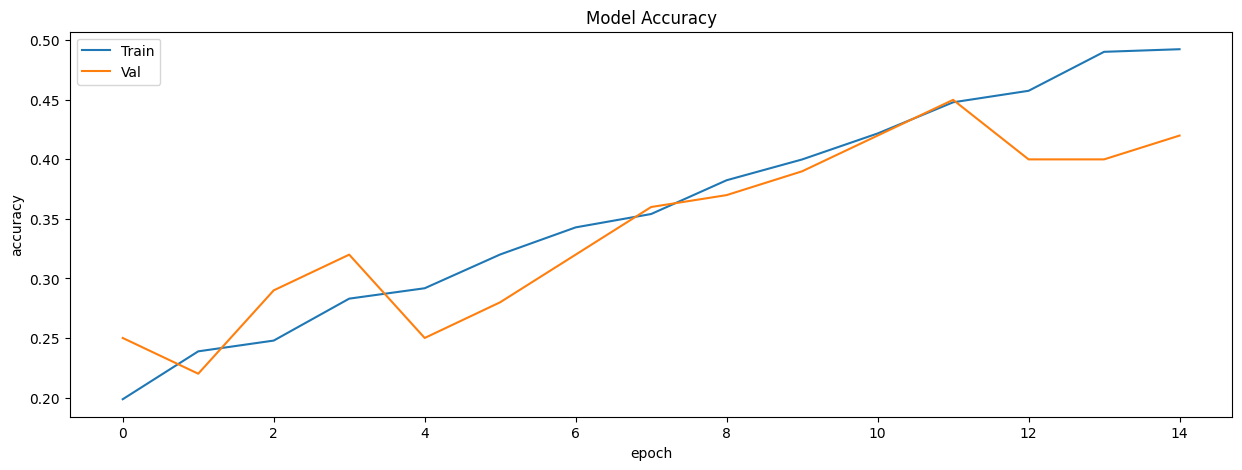

In [30]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [31]:
history = seq_model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/50
101/101 [==============================] - 9s 93ms/step - loss: 1.6284 - accuracy: 0.4922 - val_loss: 2.0361 - val_accuracy: 0.4100
Epoch 2/50
101/101 [==============================] - 9s 85ms/step - loss: 1.5644 - accuracy: 0.5184 - val_loss: 2.0208 - val_accuracy: 0.4100
Epoch 3/50
101/101 [==============================] - 9s 85ms/step - loss: 1.5279 - accuracy: 0.5147 - val_loss: 1.9794 - val_accuracy: 0.3800
Epoch 4/50
101/101 [==============================] - 8s 84ms/step - loss: 1.5528 - accuracy: 0.5178 - val_loss: 1.9417 - val_accuracy: 0.4300
Epoch 5/50
101/101 [==============================] - 9s 84ms/step - loss: 1.4657 - accuracy: 0.5324 - val_loss: 1.9666 - val_accuracy: 0.4200
Epoch 6/50
101/101 [==============================] - 9s 84ms/step - loss: 1.4198 - accuracy: 0.5505 - val_loss: 2.0184 - val_accuracy: 0.3800
Epoch 7/50
101/101 [==============================] - 8s 84ms/step - loss: 1.3773 - accuracy: 0.5720 - val_loss: 1.9850 - val_accuracy: 0.4000

In [32]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.628435,0.492207,2.036090,0.41
1,1.564369,0.518392,2.020833,0.41
2,1.527894,0.514651,1.979380,0.38
3,1.552817,0.517768,1.941690,0.43
4,1.465703,0.532419,1.966564,0.42


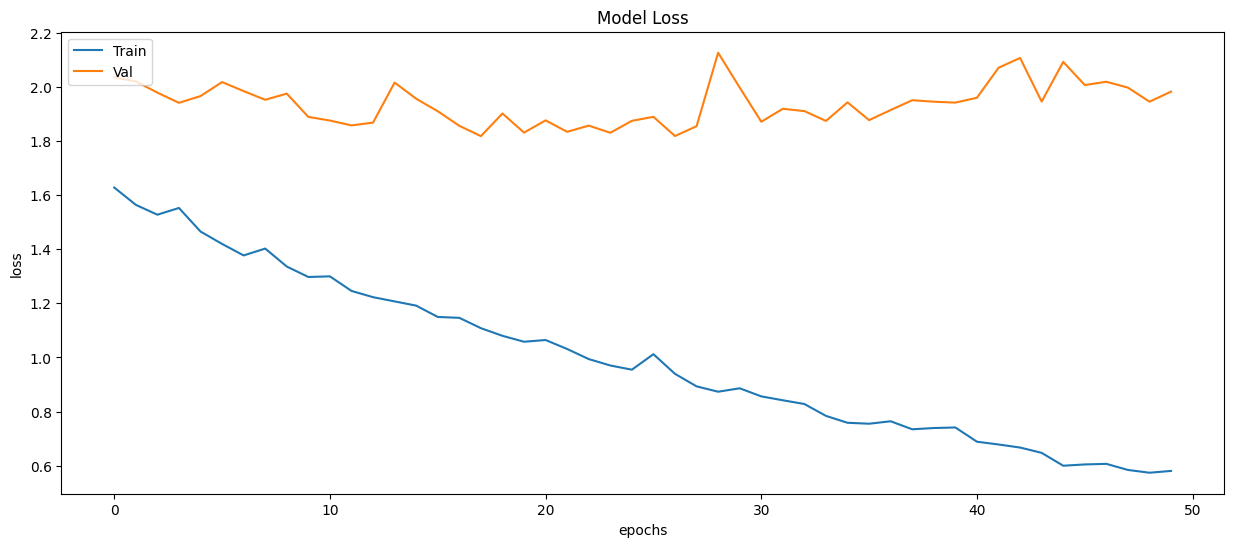

In [33]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

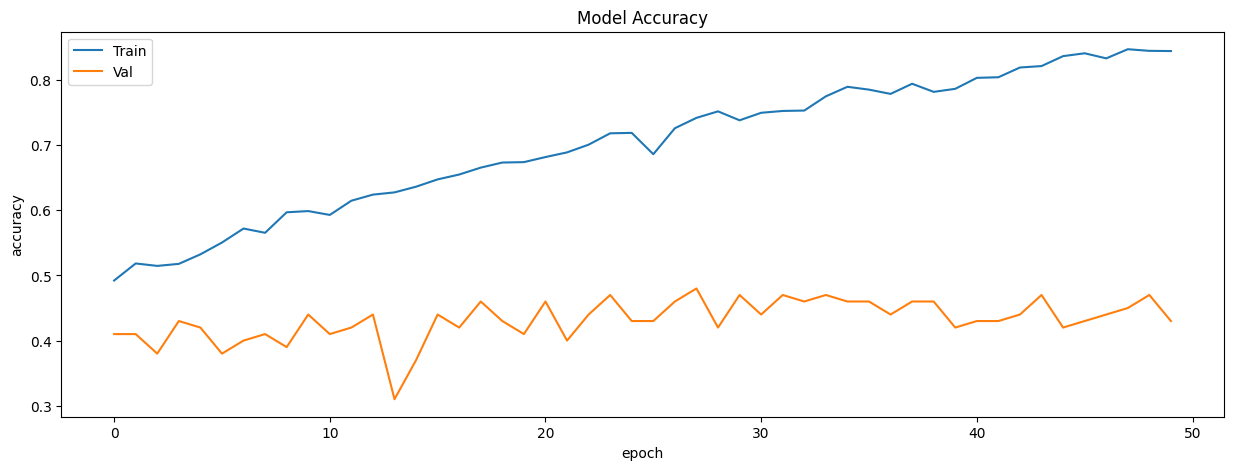

In [34]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [35]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 0s 115ms/step


In [36]:
results = seq_model.evaluate(test_generator)

4/4 [==============================] - 0s 21ms/step - loss: 1.5289 - accuracy: 0.6200


1/1 [==============================] - 0s 47ms/step


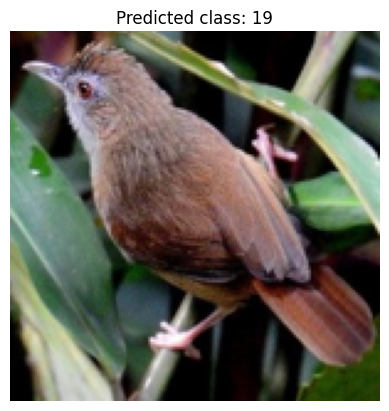

In [40]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = 'C:/Users/ASUS/Documents/AAIML/Foundations of Machine Learning Frameworks/Data/project/archive/test/ABBOTTS BABBLER'
img_size = 150

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [41]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : AMERICAN KESTREL
Class probability: 0.2290899
Predicted class for 2.jpg : AMERICAN KESTREL
Class probability: 0.5880763
Predicted class for 3.jpg : AFRICAN EMERALD CUCKOO
Class probability: 0.6027077
Predicted class for 4.jpg : AMERICAN BITTERN
Class probability: 0.20714726
Predicted class for 5.jpg : AFRICAN PYGMY GOOSE
Class probability: 0.82821757


## General Observations:
* High confidence predictions (>75%): In this case, the model is more likely to be accurate, such as with 1.jpg and 4.jpg.
* Moderate confidence predictions: 50-75% are plausible to occur, but may require further validation. For example, 3.jpg.
* Low confidence predictions (<50%): The prediction model is uncertain for 2.jpg and 5.jpg, either classifying them incorrectly or unclearly.


# ResNet-50 Model Integration

In [45]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

input_shape = (150, 150, 3)

# Load ResNet-50 with pretrained weights, exclude top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the new model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the ResNet-50 base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet-50 model
history_resnet = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Evaluate the model
resnet_eval = resnet_model.evaluate(validation_generator)
print(f"ResNet-50 Validation Loss: {resnet_eval[0]}, Validation Accuracy: {resnet_eval[1]}")



94765736/94765736 [==============================] - 30s 0us/step
Epoch 1/10
101/101 [==============================] - 67s 643ms/step - loss: 3.0003 - accuracy: 0.0611 - val_loss: 2.9692 - val_accuracy: 0.0500
Epoch 2/10
101/101 [==============================] - 66s 657ms/step - loss: 2.9555 - accuracy: 0.0867 - val_loss: 2.9328 - val_accuracy: 0.0700
Epoch 3/10
101/101 [==============================] - 66s 652ms/step - loss: 2.9214 - accuracy: 0.0969 - val_loss: 2.9066 - val_accuracy: 0.1200
Epoch 4/10
101/101 [==============================] - 66s 655ms/step - loss: 2.8833 - accuracy: 0.1269 - val_loss: 2.8787 - val_accuracy: 0.1000
Epoch 5/10
101/101 [==============================] - 66s 653ms/step - loss: 2.8468 - accuracy: 0.1312 - val_loss: 2.8363 - val_accuracy: 0.1300
Epoch 6/10
101/101 [==============================] - 66s 654ms/step - loss: 2.7968 - accuracy: 0.1605 - val_loss: 2.8110 - val_accuracy: 0.1900
Epoch 7/10
101/101 [==============================] - 66s 652ms/

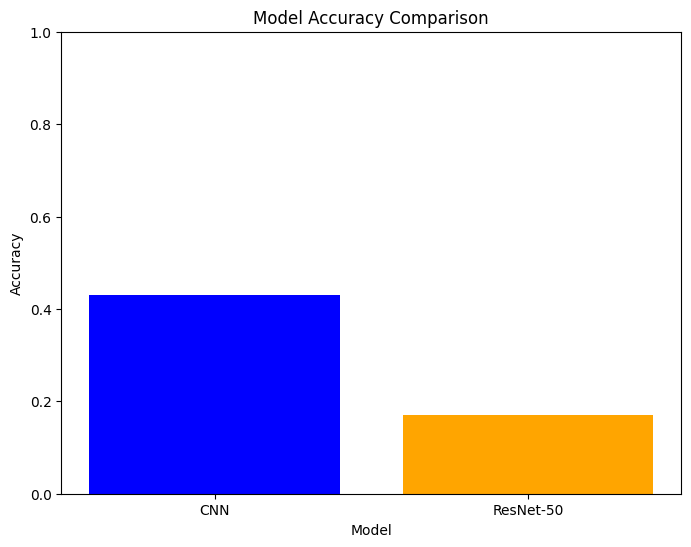

In [50]:
# Plot accuracies of both models
import matplotlib.pyplot as plt

# Replace these values with the actual accuracy results from your evaluation
existing_model_accuracy = seq_model[1]  # Accuracy of CNN model
resnet_model_accuracy = resnet_eval[1]  # Accuracy of the ResNet-50 model

# Model names and their accuracies
accuracies = [existing_model_accuracy, resnet_model_accuracy]
model_names = ['CNN', 'ResNet-50']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

From the above plot, we can see CNN performs well for classifying bird species.

### Conclusion

In this project, we want to show the effectiveness of neural networks in classifying bird species from images. The results of the evaluation will give us an overview of the performance of the model and provide a basis for further optimization and refinement of the classification system.